In [1]:
import pandas as pd

In [2]:
sample = pd.read_json("sample.json")

In [3]:
sample

,rssi,time,pv,status,si,rawValues,values,sn,binary,alert
0,-51.5,1584695412040,0,9,"[g, °C]","[5, 191]","[0.005, 19]",21000061,NaN,NaN
1,-51.5,1584695293513,0,1,"[g, °C]","[7, 192]","[0.007, 19]",21000061,NaN,NaN
2,-51.0,1584695174992,0,2,"[g, °C]","[3, 192]","[0.003, 19]",21000061,NaN,NaN
3,-51.5,1584695056478,0,3,"[g, °C]","[6, 192]","[0.006, 19]",21000061,NaN,NaN
4,-51.5,1584694937981,0,4,"[g, °C]","[6, 192]","[0.006, 19]",21000061,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2643,-52.0,1584118334179,0,3,"[g, °C]","[3, 157]","[0.003, 16]",21000061,0.0,NaN
2644,-52.5,1584118215195,0,4,"[g, °C]","[1, 157]","[0.001, 16]",21000061,0.0,NaN
2645,-52.5,1584118096188,0,5,"[g, °C]","[0, 157]","[0, 16]",21000061,0.0,NaN
2646,-52.0,1584117977183,0,6,"[g, °C]","[3, 157]","[0.003, 16]",21000061,0.0,NaN


In [4]:
s2 = sample[["time", "rawValues"]]

In [5]:
s2

,time,rawValues
0,1584695412040,"[5, 191]"
1,1584695293513,"[7, 192]"
2,1584695174992,"[3, 192]"
3,1584695056478,"[6, 192]"
4,1584694937981,"[6, 192]"
...,...,...
2643,1584118334179,"[3, 157]"
2644,1584118215195,"[1, 157]"
2645,1584118096188,"[0, 157]"
2646,1584117977183,"[3, 157]"


In [27]:
s2["rawValues"].str.extract('(P?<g>.*)')

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2643,NaN
2644,NaN
2645,NaN
2646,NaN


In [28]:
s2.rawValues.str.split(',')

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2643   NaN
2644   NaN
2645   NaN
2646   NaN
2647   NaN
Name: rawValues, Length: 2648, dtype: float64

In [29]:
s2["rawValues"].str.split(',')

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2643   NaN
2644   NaN
2645   NaN
2646   NaN
2647   NaN
Name: rawValues, Length: 2648, dtype: float64

In [31]:
s2["rawValues"].str.slice(stop=1)

0       [5]
1       [7]
2       [3]
3       [6]
4       [6]
       ... 
2643    [3]
2644    [1]
2645    [0]
2646    [3]
2647    [2]
Name: rawValues, Length: 2648, dtype: object

In [33]:
s2 = sample[["time", "rawValues"]]

In [34]:
s2

,time,rawValues
0,1584695412040,"[5, 191]"
1,1584695293513,"[7, 192]"
2,1584695174992,"[3, 192]"
3,1584695056478,"[6, 192]"
4,1584694937981,"[6, 192]"
...,...,...
2643,1584118334179,"[3, 157]"
2644,1584118215195,"[1, 157]"
2645,1584118096188,"[0, 157]"
2646,1584117977183,"[3, 157]"


In [78]:
s2.rawValues.values[0:3]

array([list([5, 191]), list([7, 192]), list([3, 192])], dtype=object)

In [81]:
s2['g_C'] = [','.join(map(str, l)) for l in s2['rawValues']]

<ipython-input-81-58a6da66d949>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2['g_C'] = [','.join(map(str, l)) for l in s2['rawValues']]


In [91]:
s2['g_C'] = s2['rawValues'].apply(lambda x: ','.join(map(str, x)))

<ipython-input-91-c446cb10d10e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2['g_C'] = s2['rawValues'].apply(lambda x: ','.join(map(str, x)))


In [88]:
s2['g_C'] = s2['rawValues'].apply(lambda x:[int(i) for i in x])

<ipython-input-88-4f91072a123a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2['g_C'] = s2['rawValues'].apply(lambda x:[int(i) for i in x])


In [92]:
s2.loc[1:5]

,time,rawValues,g_C
1,1584695293513,"[7, 192]","7,192"
2,1584695174992,"[3, 192]","3,192"
3,1584695056478,"[6, 192]","6,192"
4,1584694937981,"[6, 192]","6,192"
5,1584694819468,"[6, 192]","6,192"


In [101]:
s2['C'] = s2['g_C'].str.slice(start=2)

<ipython-input-101-361b234a6273>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2['C'] = s2['g_C'].str.slice(start=2)


In [102]:
s2.head()

,time,rawValues,g_C,g,C
0,1584695412040,"[5, 191]","5,191",5,191
1,1584695293513,"[7, 192]","7,192",7,192
2,1584695174992,"[3, 192]","3,192",3,192
3,1584695056478,"[6, 192]","6,192",6,192
4,1584694937981,"[6, 192]","6,192",6,192


In [103]:
s2

,time,rawValues,g_C,g,C
0,1584695412040,"[5, 191]","5,191",5,191
1,1584695293513,"[7, 192]","7,192",7,192
2,1584695174992,"[3, 192]","3,192",3,192
3,1584695056478,"[6, 192]","6,192",6,192
4,1584694937981,"[6, 192]","6,192",6,192
...,...,...,...,...,...
2643,1584118334179,"[3, 157]","3,157",3,157
2644,1584118215195,"[1, 157]","1,157",1,157
2645,1584118096188,"[0, 157]","0,157",0,157
2646,1584117977183,"[3, 157]","3,157",3,157


In [104]:
s2.plot("time","g")

TypeError: no numeric data to plot

In [109]:
s3 = s2[["g"]]

In [111]:
s3

,g
0,5
1,7
2,3
3,6
4,6
...,...
2643,3
2644,1
2645,0
2646,3


In [112]:
s3.plot()

TypeError: no numeric data to plot

In [115]:
s3.dtypes

g    object
dtype: object

In [116]:
s3['g'] = s3['g'].astype(int)

<ipython-input-116-197c53eaca66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s3['g'] = s3['g'].astype(int)


In [117]:
s3

,g
0,5
1,7
2,3
3,6
4,6
...,...
2643,3
2644,1
2645,0
2646,3


In [118]:
s3.dtypes

g    int64
dtype: object

<AxesSubplot:>

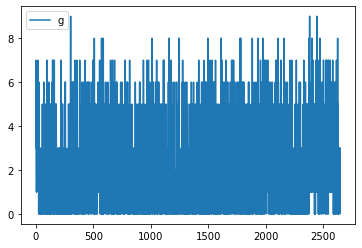

In [119]:
s3.plot()

In [120]:
g = sample[["time", "values"]]

In [121]:
g

,time,values
0,1584695412040,"[0.005, 19]"
1,1584695293513,"[0.007, 19]"
2,1584695174992,"[0.003, 19]"
3,1584695056478,"[0.006, 19]"
4,1584694937981,"[0.006, 19]"
...,...,...
2643,1584118334179,"[0.003, 16]"
2644,1584118215195,"[0.001, 16]"
2645,1584118096188,"[0, 16]"
2646,1584117977183,"[0.003, 16]"


In [122]:
g['g_C'] = [','.join(map(str, l)) for l in g['values']]

<ipython-input-122-e72591bb7307>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g['g_C'] = [','.join(map(str, l)) for l in g['values']]


In [123]:
g

,time,values,g_C
0,1584695412040,"[0.005, 19]","0.005,19"
1,1584695293513,"[0.007, 19]","0.007,19"
2,1584695174992,"[0.003, 19]","0.003,19"
3,1584695056478,"[0.006, 19]","0.006,19"
4,1584694937981,"[0.006, 19]","0.006,19"
...,...,...,...
2643,1584118334179,"[0.003, 16]","0.003,16"
2644,1584118215195,"[0.001, 16]","0.001,16"
2645,1584118096188,"[0, 16]","0,16"
2646,1584117977183,"[0.003, 16]","0.003,16"


In [137]:
g['g'] = g['g_C'].str.slice(stop=-3)

<ipython-input-137-d61026fd986c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g['g'] = g['g_C'].str.slice(stop=-3)


In [143]:
g.dtypes

time        int64
values     object
g_C        object
g         float64
dtype: object

In [141]:
g['g'] = g['g'].astype(float)

<ipython-input-141-393fe2f870da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g['g'] = g['g'].astype(float)


In [142]:
g

,time,values,g_C,g
0,1584695412040,"[0.005, 19]","0.005,19",0.005
1,1584695293513,"[0.007, 19]","0.007,19",0.007
2,1584695174992,"[0.003, 19]","0.003,19",0.003
3,1584695056478,"[0.006, 19]","0.006,19",0.006
4,1584694937981,"[0.006, 19]","0.006,19",0.006
...,...,...,...,...
2643,1584118334179,"[0.003, 16]","0.003,16",0.003
2644,1584118215195,"[0.001, 16]","0.001,16",0.001
2645,1584118096188,"[0, 16]","0,16",0.000
2646,1584117977183,"[0.003, 16]","0.003,16",0.003


<AxesSubplot:>

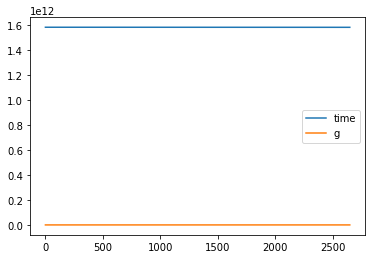

In [144]:
g.plot()

In [147]:
g2 = g[g["g"] > 0.1]

In [149]:
g2

,time,values,g_C,g
79,1584658291833,"[0.275, 20]","0.275,20",0.275
186,1584648048665,"[0.107, 19]","0.107,19",0.107
851,1584379047927,"[0.241, 16]","0.241,16",0.241
853,1584378981491,"[0.108, 16]","0.108,16",0.108
858,1584378761326,"[0.312, 16]","0.312,16",0.312
1399,1584294920025,"[0.183, 16]","0.183,16",0.183
1406,1584294658374,"[0.11, 16]","0.11,16",0.110
1417,1584293837814,"[0.761, 16]","0.761,16",0.761
1595,1584278304209,"[0.12, 16]","0.12,16",0.120
1723,1584266136700,"[0.117, 19]","0.117,19",0.117


In [150]:
g3 = g2[["g"]]

<AxesSubplot:>

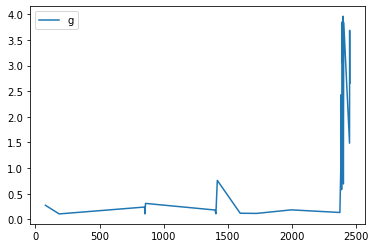

In [152]:
g3.plot()